<a href="https://colab.research.google.com/github/shreethaar/The-Magic-of-the-Sorting-Hat/blob/master/hogwarts_house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
%cd /content/drive/MyDrive/A232/Data\ Analytics/project

/content/drive/MyDrive/A232/Data Analytics/project


In [76]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scipy

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [78]:
df=pd.read_excel('hogwarts_dataset.xlsx',sheet_name='Form Responses 1')
df.to_csv('hogwarts_dataset.csv',index=False)

In [79]:
df=pd.read_csv('hogwarts_dataset.csv')
df.head()

,Timestamp,"""From whom did you receive this Google Form?""",Personality Traits,Behavioural Traits,Hobbies,GPA,Hometown,Inasis,Co-curriculum Activities,Leadership Experience,Favourite Cuisine,Estimated Household Income,Number of Best Friends,Faculty,Hogwarts House
0,2024-07-01 21:46:26.450,HIKMAH,Openness,Independence,Physical,3.45,Perak,Inasis TM,NETBALL,No,Malay,750.0,7,SEFB,Ravenclaw
1,2024-07-07 21:30:00.964,Ain najwa,Extraversion,Collaboration,Cerebral,3.60,Pahang,Inasis BANK RAKYAT,LEADERSHIP,No,Thai,800.0,2,SOE,Hufflepuff
2,2024-07-03 08:51:07.434,Friend,Openness,Discipline,Cerebral,3.80,Kedah,Inasis MAS,COMMUNITY DEVELOPMENT,No,Malay,1000.0,6,SOC,Hufflepuff
3,2024-07-02 21:58:47.816,SRI MADIHA SOFIYAH,Openness,Risk-Taking,Community-activities,3.89,Negeri Sembilan,Rumah Sendiri,OLAHRAGA,Yes,Malay,1000.0,4,SOC,Ravenclaw
4,2024-07-03 20:00:49.817,Ayunni,Conscientiousness,Collaboration,Physical,3.53,Kedah,Inasis TRADEWINDS,RELASIS,No,Malay,1000.0,5,STML,Hufflepuff


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 15 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Timestamp                                       150 non-null    object 
 1   "From whom did you receive this Google Form?"   150 non-null    object 
 2   Personality Traits                              150 non-null    object 
 3   Behavioural Traits                              150 non-null    object 
 4   Hobbies                                         150 non-null    object 
 5   GPA                                             150 non-null    float64
 6   Hometown                                        150 non-null    object 
 7   Inasis                                          150 non-null    object 
 8   Co-curriculum Activities                        134 non-null    object 
 9   Leadership Experience                      

In [81]:
df.drop(df.columns[[0,1]],axis=1)

,Personality Traits,Behavioural Traits,Hobbies,GPA,Hometown,Inasis,Co-curriculum Activities,Leadership Experience,Favourite Cuisine,Estimated Household Income,Number of Best Friends,Faculty,Hogwarts House
0,Openness,Independence,Physical,3.45,Perak,Inasis TM,NETBALL,No,Malay,750.0,7,SEFB,Ravenclaw
1,Extraversion,Collaboration,Cerebral,3.60,Pahang,Inasis BANK RAKYAT,LEADERSHIP,No,Thai,800.0,2,SOE,Hufflepuff
2,Openness,Discipline,Cerebral,3.80,Kedah,Inasis MAS,COMMUNITY DEVELOPMENT,No,Malay,1000.0,6,SOC,Hufflepuff
3,Openness,Risk-Taking,Community-activities,3.89,Negeri Sembilan,Rumah Sendiri,OLAHRAGA,Yes,Malay,1000.0,4,SOC,Ravenclaw
4,Conscientiousness,Collaboration,Physical,3.53,Kedah,Inasis TRADEWINDS,RELASIS,No,Malay,1000.0,5,STML,Hufflepuff
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Openness,Independence,Cerebral,3.45,Selangor,Inasis MAYBANK,TAEKWONDO,No,Korean,20000.0,1,SMMTC,Hufflepuff
146,Extraversion,Independence,Creative,3.98,Kuala Lumpur,Inasis PETRONAS,PENGANGKAP,Yes,Thai,120000.0,1,STML,Ravenclaw
147,Openness,Risk-Taking,Physical,3.50,Melaka,Inasis GRANTT,SILAT,Yes,Western,200000.0,2,IBS,Slytherin
148,Openness,Risk-Taking,Physical,3.68,Kedah,Inasis MUAMALAT,COMMUNITY DEVELOPMENT,Yes,Chinese,NaN,5,SOL,Slytherin


In [82]:
df.isnull().sum()

Timestamp                                          0
"From whom did you receive this Google Form?"      0
Personality Traits                                 0
Behavioural Traits                                 0
Hobbies                                            0
GPA                                                0
Hometown                                           0
Inasis                                             0
Co-curriculum Activities                          16
Leadership Experience                              0
Favourite Cuisine                                  0
Estimated Household Income                         2
Number of Best Friends                             0
Faculty                                            0
Hogwarts House                                     0
dtype: int64

In [83]:
df.isnull().sum()/len(df)*100

Timestamp                                          0.000000
"From whom did you receive this Google Form?"      0.000000
Personality Traits                                 0.000000
Behavioural Traits                                 0.000000
Hobbies                                            0.000000
GPA                                                0.000000
Hometown                                           0.000000
Inasis                                             0.000000
Co-curriculum Activities                          10.666667
Leadership Experience                              0.000000
Favourite Cuisine                                  0.000000
Estimated Household Income                         1.333333
Number of Best Friends                             0.000000
Faculty                                            0.000000
Hogwarts House                                     0.000000
dtype: float64

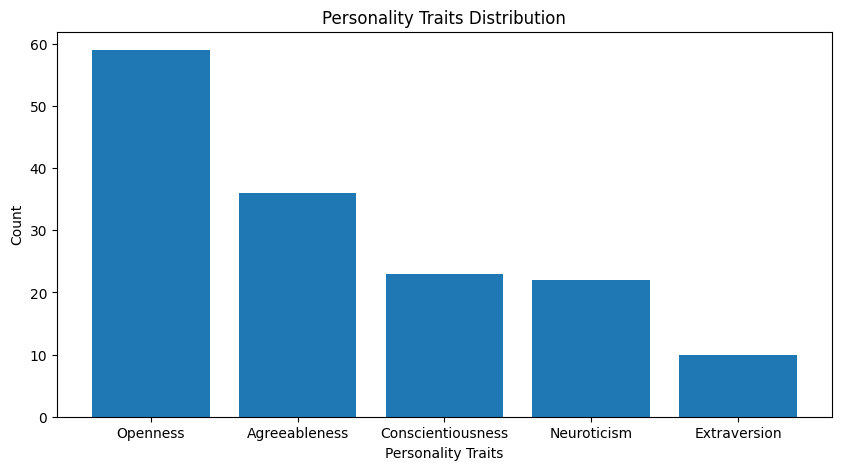

In [84]:
#Personality Traits Distribution
personality=df['Personality Traits'].value_counts()
plt.figure(figsize=(10,5))
plt.bar(personality.index,personality.values)
plt.title('Personality Traits Distribution')
plt.xlabel('Personality Traits')
plt.ylabel('Count')
plt.show()

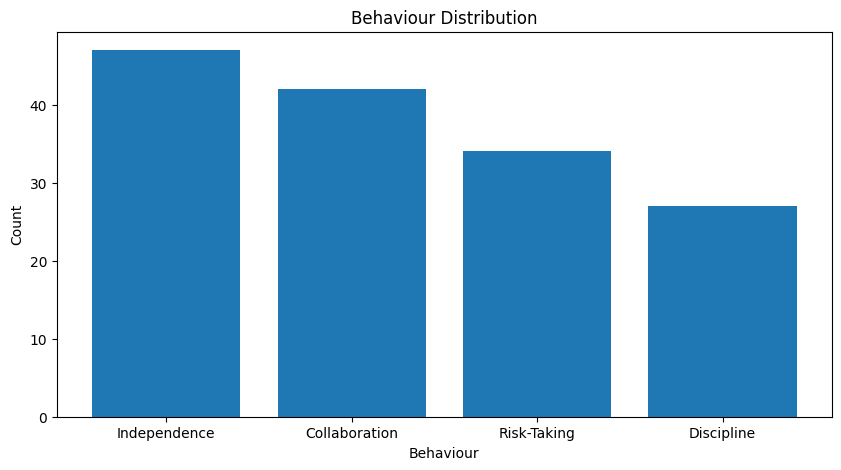

In [85]:
# Behavioural Traits Distribution
behaviour=df['Behavioural Traits'].value_counts()
plt.figure(figsize=(10,5))
plt.bar(behaviour.index,behaviour.values)
plt.title('Behaviour Distribution')
plt.xlabel('Behaviour')
plt.ylabel('Count')
plt.show()

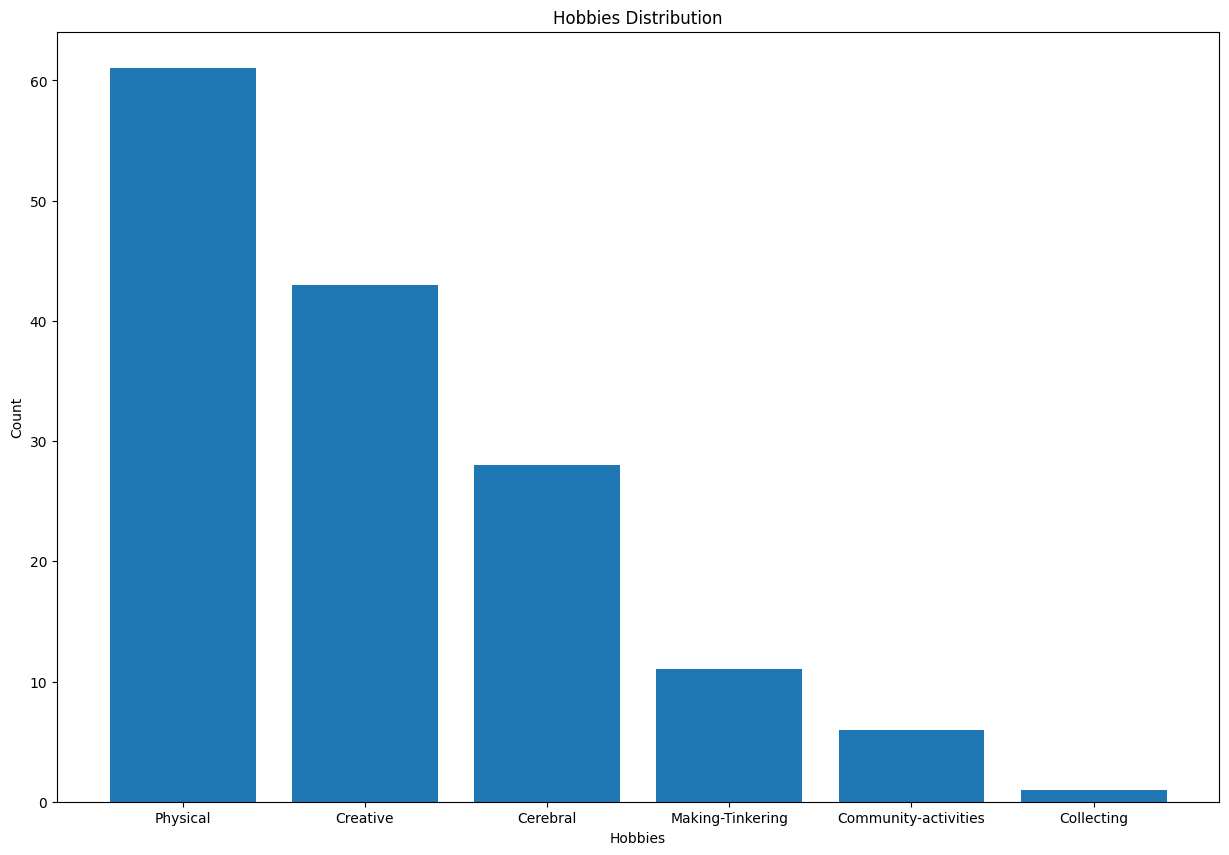

In [86]:
# Hobbies Distribution
hobbies=df['Hobbies'].value_counts()
plt.figure(figsize=(15,10))
plt.bar(hobbies.index,hobbies.values)
plt.title('Hobbies Distribution')
plt.xlabel('Hobbies')
plt.ylabel('Count')
plt.show()

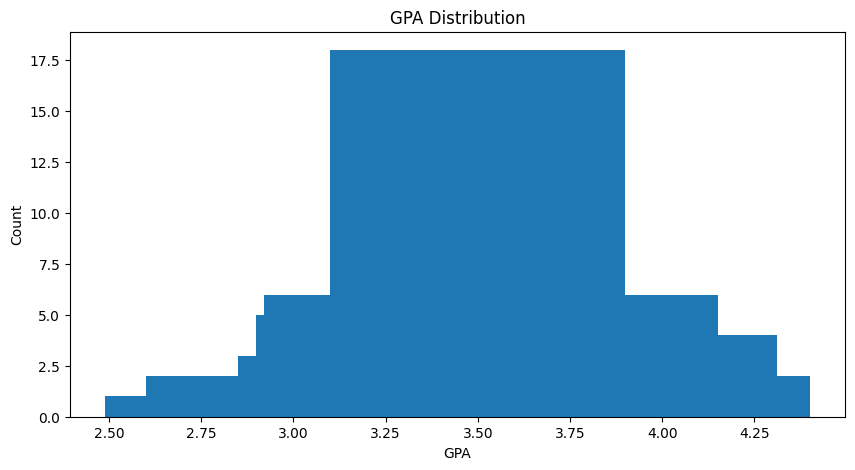

In [87]:
# GPA distribution
gpa=df['GPA'].value_counts()
plt.figure(figsize=(10,5))
plt.bar(gpa.index,gpa.values)
plt.title('GPA Distribution')
plt.xlabel('GPA')
plt.ylabel('Count')
plt.show()

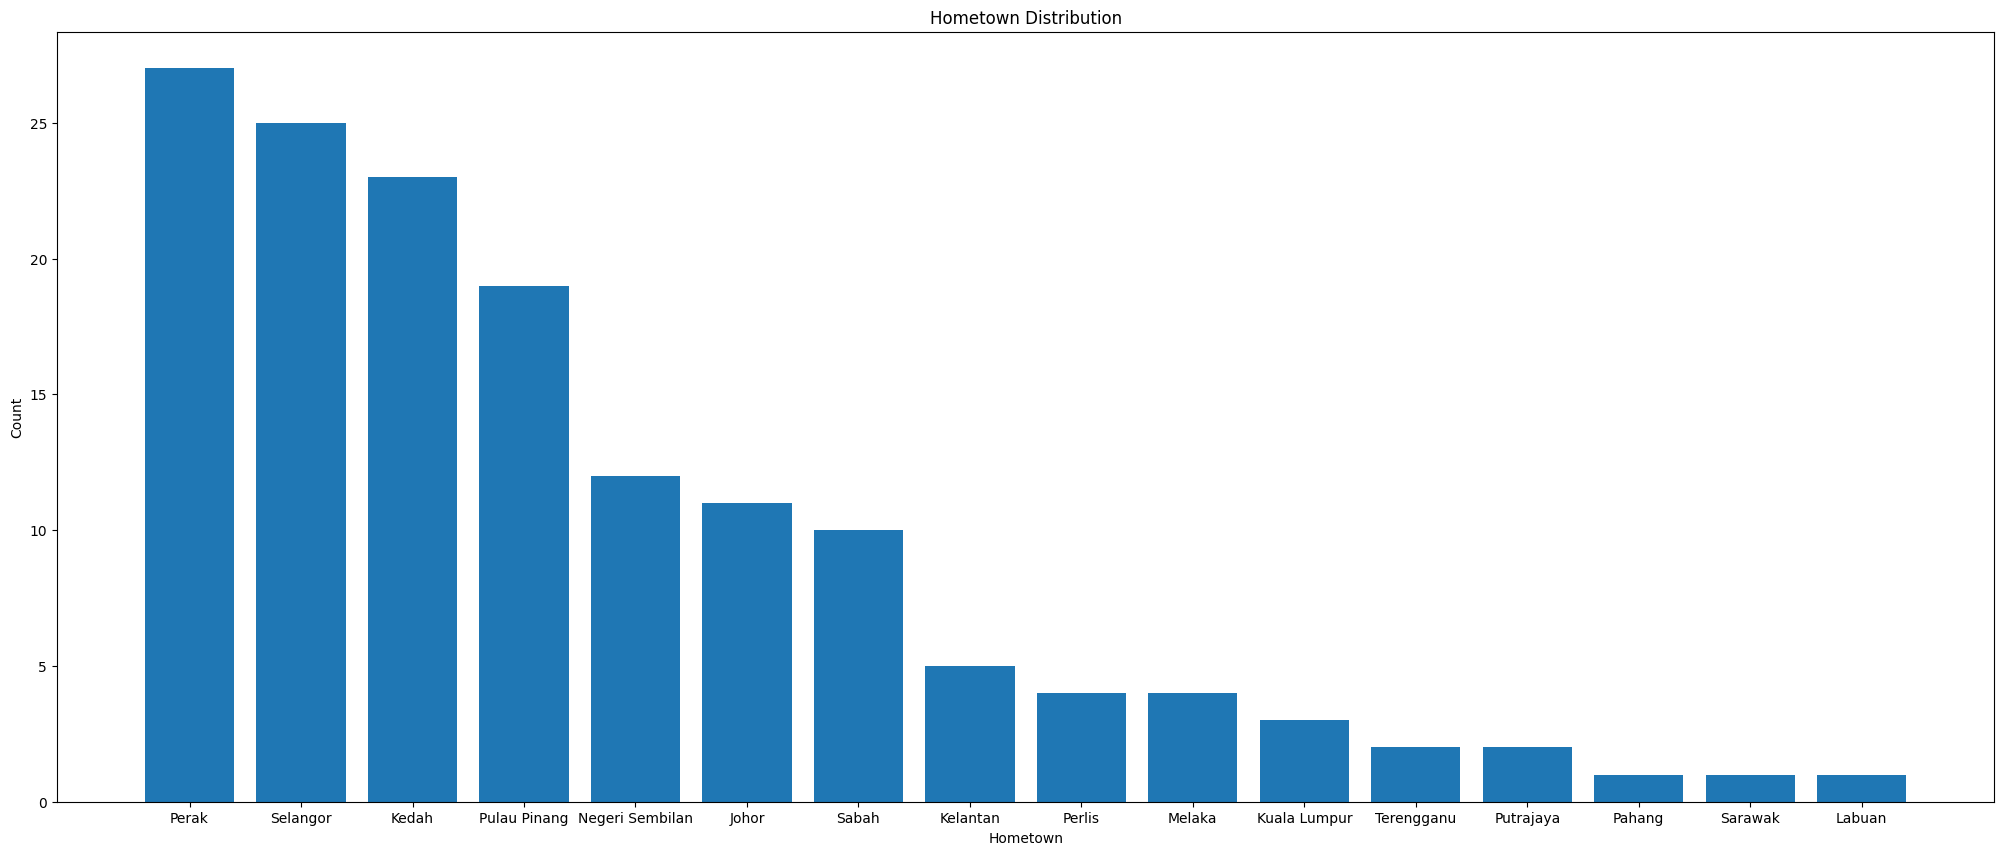

In [88]:
# Hometown
hometown=df['Hometown'].value_counts()
plt.figure(figsize=(25,10))
plt.bar(hometown.index,hometown.values)
plt.title('Hometown Distribution')
plt.xlabel('Hometown')
plt.ylabel('Count')
plt.show()

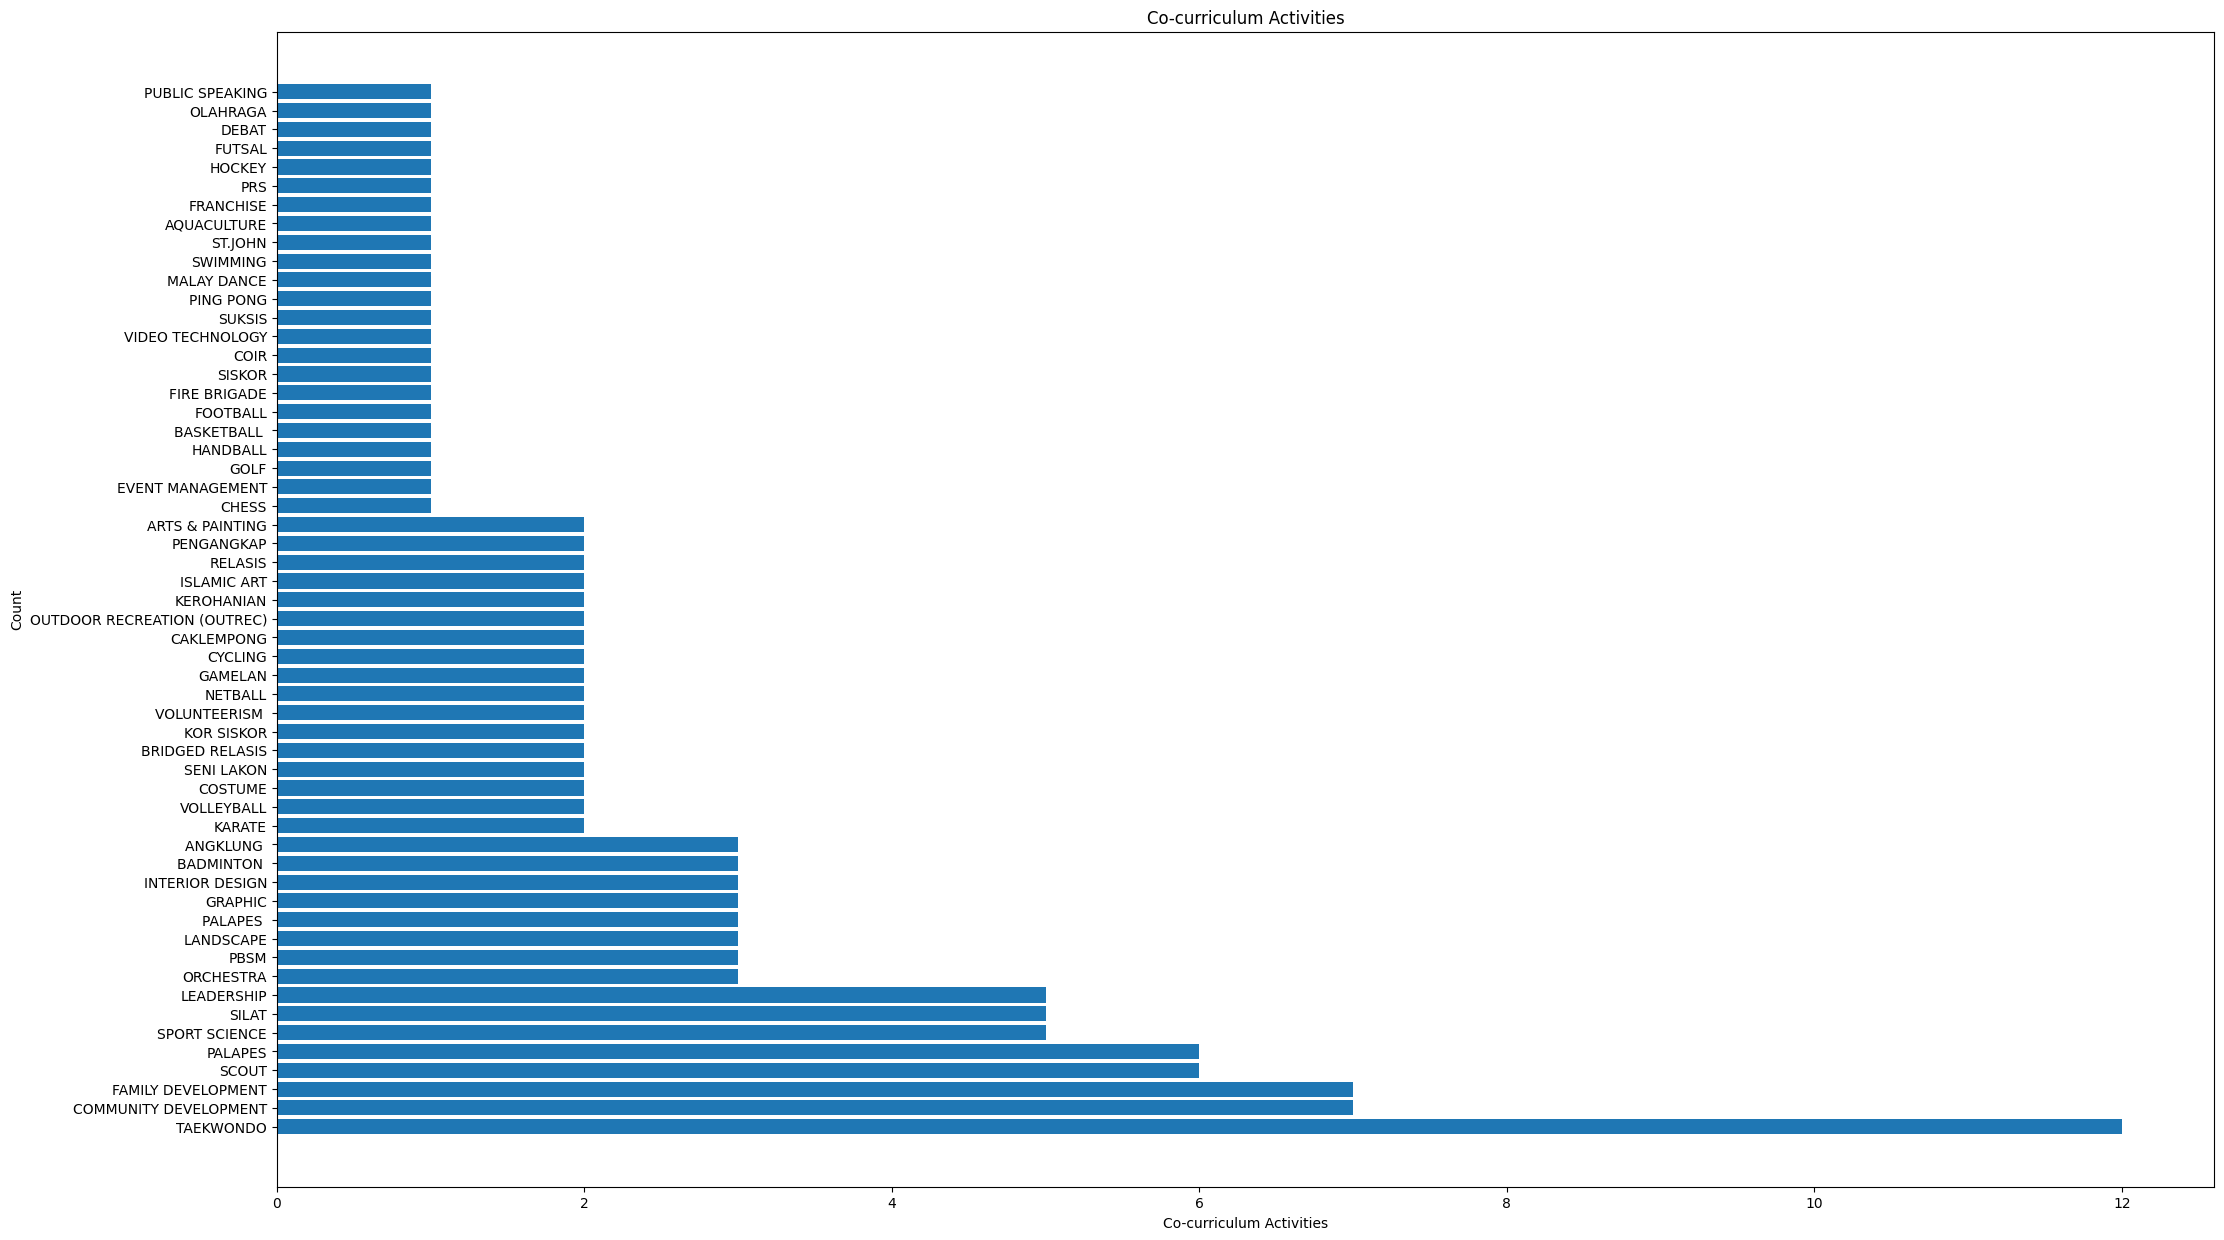

In [97]:
# Co-curriculum distribution
df['Co-curriculum Activities'].fillna('TAEKWONDO')
kok=df['Co-curriculum Activities'].value_counts()
plt.figure(figsize=(25,15))
plt.barh(kok.index,kok.values)
plt.title('Co-curriculum Activities')
plt.xlabel('Co-curriculum Activities')
plt.ylabel('Count')
plt.show()

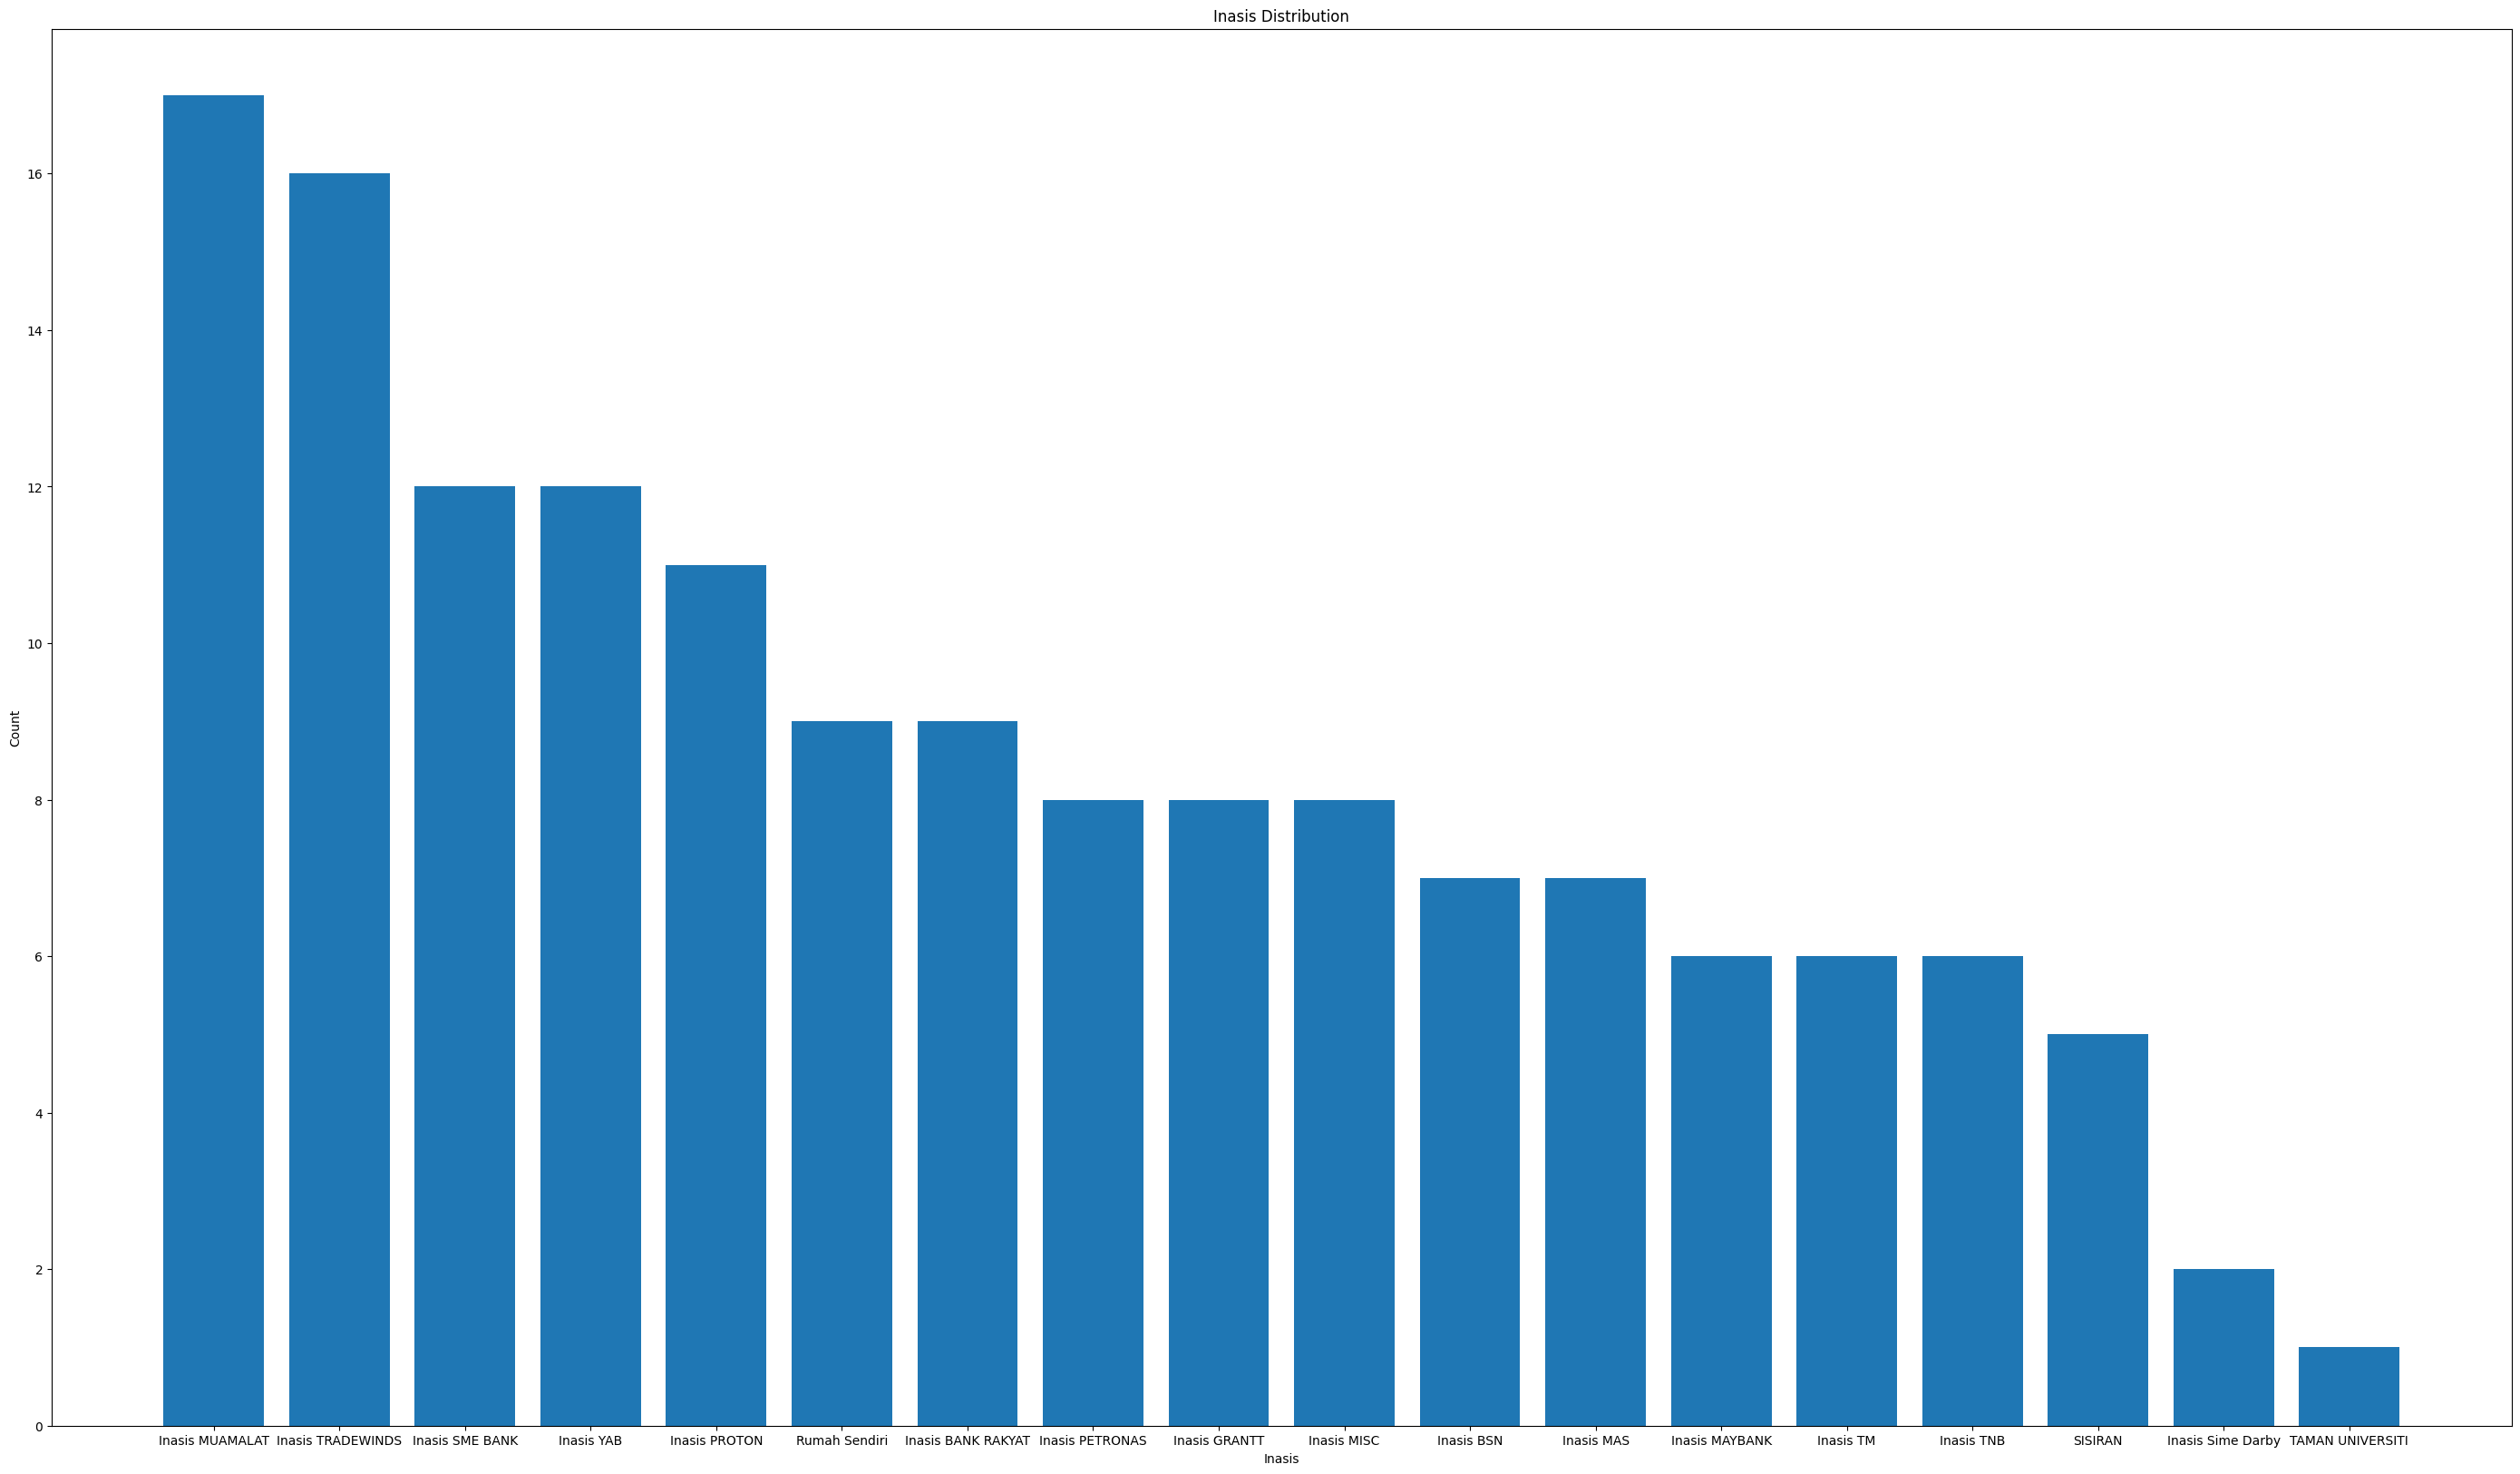

In [90]:
#Inasis Distribution
inasis=df['Inasis'].value_counts()
plt.figure(figsize=(35,20))
plt.bar(inasis.index,inasis.values)
plt.title('Inasis Distribution')
plt.xlabel('Inasis')
plt.ylabel('Count')
plt.show()

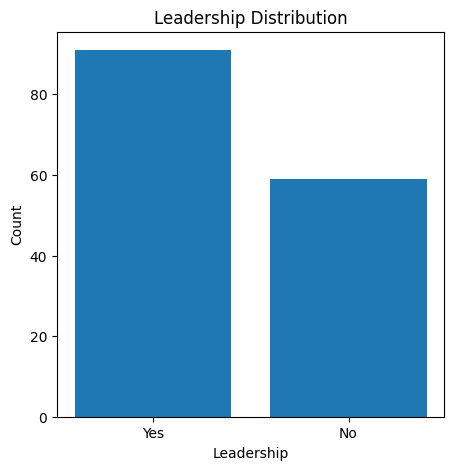

In [91]:
# Leadership Distribution
leadership=df['Leadership Experience'].value_counts()
plt.figure(figsize=(5,5))
plt.bar(leadership.index,leadership.values)
plt.title('Leadership Distribution')
plt.xlabel('Leadership')
plt.ylabel('Count')
plt.show()

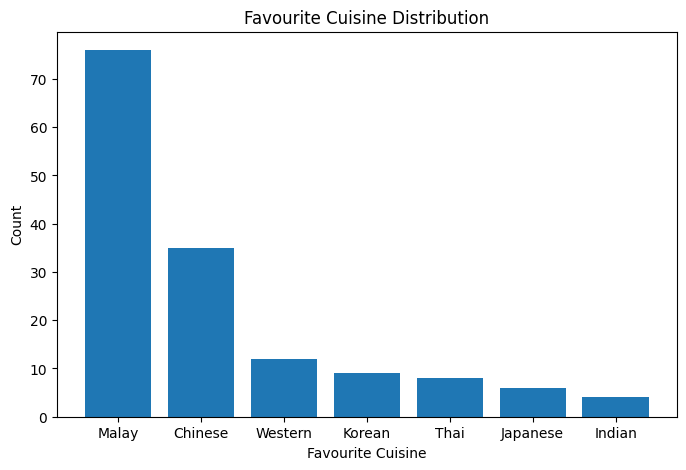

In [92]:
cuisine=df['Favourite Cuisine'].value_counts()
plt.figure(figsize=(8,5))
plt.bar(cuisine.index,cuisine.values)
plt.title('Favourite Cuisine Distribution')
plt.xlabel('Favourite Cuisine')
plt.ylabel('Count')
plt.show()

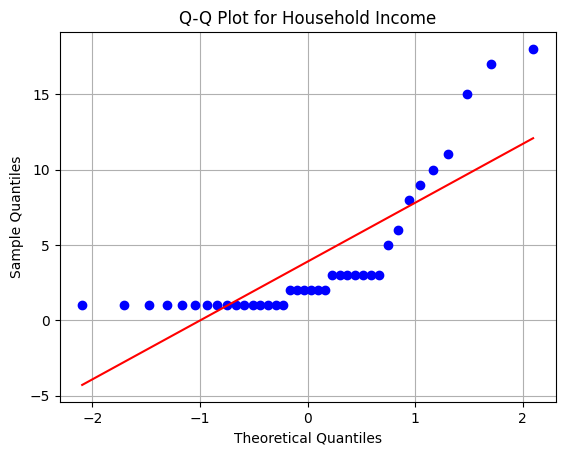

In [93]:
# estimated family income
income=df['Estimated Household Income'].value_counts()
stats.probplot(income, dist="norm", plot=plt)
plt.title('Q-Q Plot for Household Income')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

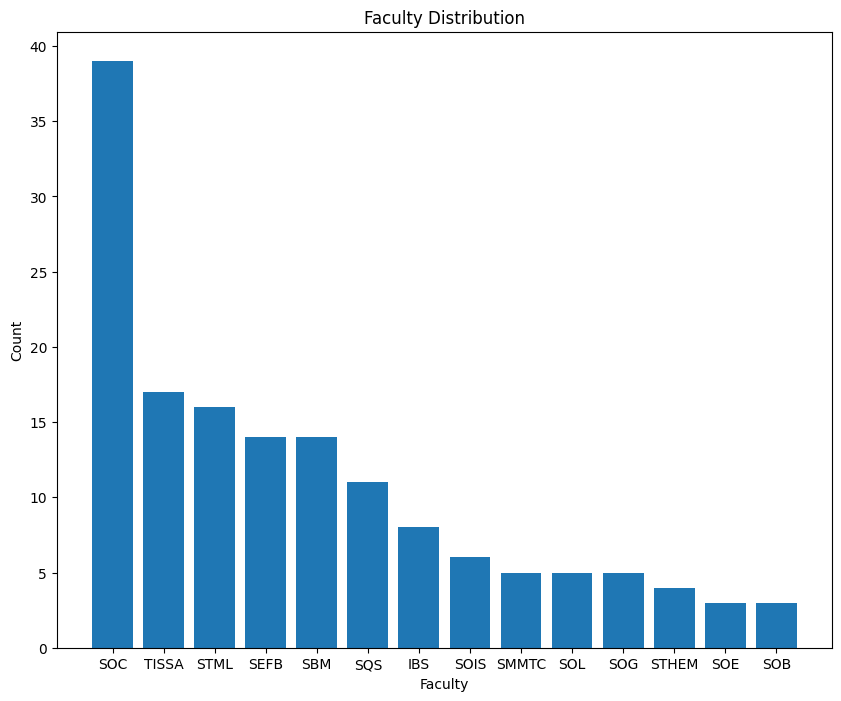

In [94]:
# faculty distribution
faculty=df['Faculty'].value_counts()
plt.figure(figsize=(10,8))
plt.bar(faculty.index,faculty.values)
plt.title('Faculty Distribution')
plt.xlabel('Faculty')
plt.ylabel('Count')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 15 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Timestamp                                       150 non-null    object 
 1   "From whom did you receive this Google Form?"   150 non-null    object 
 2   Personality Traits                              150 non-null    object 
 3   Behavioural Traits                              150 non-null    object 
 4   Hobbies                                         150 non-null    object 
 5   GPA                                             150 non-null    float64
 6   Hometown                                        150 non-null    object 
 7   Inasis                                          150 non-null    object 
 8   Co-curriculum Activities                        134 non-null    object 
 9   Leadership Experience                      